In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import keras
from keras.preprocessing.image import ImageDataGenerator

In [53]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [54]:
# rotation range in degrees
augment = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                            shear_range = 0.15, zoom_range=0.1, channel_shift_range=10.,
                            horizontal_flip=True)

In [55]:
# this code works for jpg, png encounters dimension errors later on
image_path = 'C:/Users/PandaBear/Pictures/777j.jpg'

4


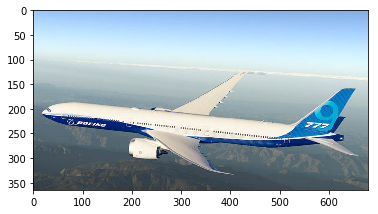

<Figure size 432x288 with 0 Axes>

In [56]:
# obtain image
image = np.expand_dims(plt.imread(image_path),0) # adds additional axis to fit for the flow function
plt.imshow(image[0])

# check dimensions
fig = plt.figure()
size = fig.get_size_inches()*fig.dpi
print(image.ndim)

In [57]:
# generate batches of augmented images with flow
aug_iter = augment.flow(image)

In [58]:
# obtain images from batch
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(20)]

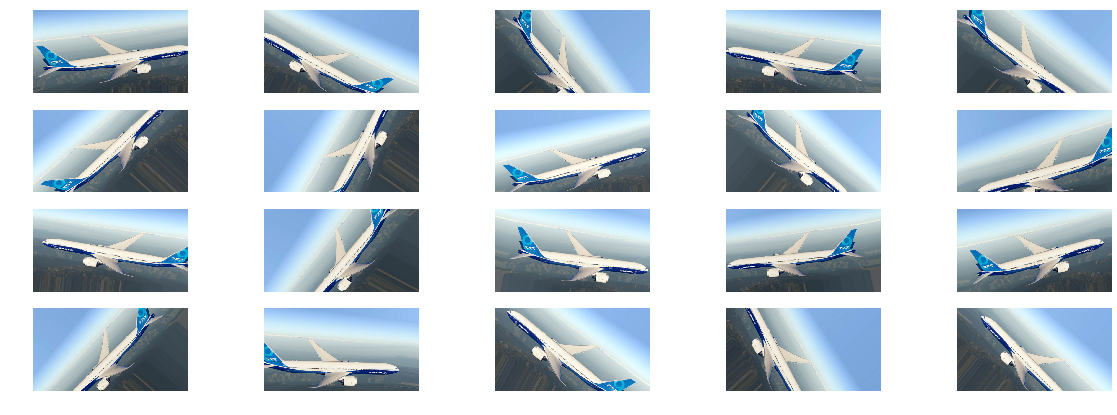

In [59]:
# plot augmented images
plots(aug_images, figsize=(20,7), rows=4)